In [53]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

header = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,/;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
}

brand = []
model = []
price = []
road_trip=  []
fuel_type = []
location = []
engine = []
year = []
l=[]
r=[]

for i in range(2,20):
    urls = "https://droom.in/super-bikes?category=super+bike&selected_category=super+bike&location=hyderabad%2Cbangalore%2Cchennai%2Cmumbai&page="+str(i)
    web_page = requests.get(urls)
    web_page = requests.get(urls,headers=header)
    html_code = BeautifulSoup(web_page.text)
    details = html_code.find_all("h5",class_="w-[89%] text-base font-medium")
    
    for i in details:
        brand.append(i.text.split()[1])
    
    for i in details:
        model.append(i.text[5:])

    prices = html_code.find_all("h6",class_="font-semibold text-[#30343e]")
    for i in prices:
        price.append(i.text.split()[1])
    
    trips = html_code.find_all("span",class_="ps-2 text-xs font-thin capitalize text-[#30343e]")
    for i in trips:
        a = re.findall(r"\d+\,\d+",i.text)
        if len(a)>0:
            r.append(a[0])
        else:
            r.append(np.nan)
            
    
            
    fuels = html_code.find_all("span",class_="ps-2 text-xs font-thin capitalize text-[#30343e]")
    for i in fuels:
        a = re.findall(r"petrol",i.text)
        if len(a)>0:
            fuel_type.append(a[0])
    
    locations = html_code.find_all("span",class_="ps-2 text-xs font-thin capitalize text-[#30343e]")
    for i in locations:
        a = re.findall(r"hyderabad|bangalore|mumbai|chennai|Hyderabad|Bangalore|Chennai|Mumbai",i.text)
        if len(a)>0:
            l.append(a[0])
        else:
            l.append(np.nan)
    
    for i in details:
        a = re.findall(r"\s\d+\sGS|\s\d+cc|\s\d+\sABS|\s\d+\sR|\s\d+i|\s\d..",i.text)
        if len(a)>0:
            engine.append(a[0])
        else:
            engine.append(np.nan)
    
    for i in details:
        year.append(i.text.split()[0])
for i in range(1,1729,4):
    location.append(l[i])
for i in range(0,1728,4):
    road_trip.append(r[i])    

        
dic = {"Brand":brand,
        "Model":model,
        "Price":price,
        "Location":location,
        "Engine":engine,
        "Model Year":year,
        "Fuel Type":fuel_type,
       "Road Trip":road_trip
      }

final_dataset = pd.DataFrame(dic)
final_dataset.to_csv("Final_Dataset_CSV.csv")

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv(r"C:\Users\91630\Final_Dataset_CSV.csv")
dataset.head()

,Unnamed: 0,Brand,Model,Price,Location,Engine,Model Year,Fuel Type,Road Trip
0,0,Royal,Royal Enfield Continental GT 650cc,"2,95,000",mumbai,650cc,2019,petrol,"4,200"
1,1,Harley-Davidson,Harley-Davidson Street 750,"3,20,000",hyderabad,750,2015,petrol,"35,900"
2,2,Royal,Royal Enfield Interceptor 650cc,"3,10,000",hyderabad,650cc,2022,petrol,"7,050"
3,3,BMW,BMW G310 RR Standard,"3,10,000",hyderabad,NaN,2023,petrol,"6,900"
4,4,Royal,Royal Enfield Continental GT 650cc,"3,40,000",mumbai,650cc,2020,petrol,"13,000"


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  432 non-null    int64 
 1   Brand       432 non-null    object
 2   Model       432 non-null    object
 3   Price       432 non-null    object
 4   Location    415 non-null    object
 5   Engine      333 non-null    object
 6   Model Year  432 non-null    int64 
 7   Fuel Type   432 non-null    object
 8   Road Trip   395 non-null    object
dtypes: int64(2), object(7)
memory usage: 30.5+ KB


In [9]:
# Dropping First Column 
sl_no=np.arange(1,433)
dataset['sl_no']=sl_no
dataset=dataset.set_index('sl_no')
dataset['Location']=dataset['Location'].fillna(dataset['Location'].mode()[0])
dataset['Road Trip']=dataset['Road Trip'].str.replace(',','')
dataset['Road Trip']=dataset['Road Trip'].astype('float')
dataset['Road Trip']=dataset['Road Trip'].fillna(dataset['Road Trip'].mean())
dataset['Road Trip']=dataset['Road Trip'].astype('int')
dataset['Engine']=dataset['Engine'].str.replace('cc','').str.replace('ABS','').str.replace('R','').str.replace('i','').str.replace('GS','').str.strip()
dataset['Engine']=dataset['Engine'].astype('float')
dataset['Engine'].mean()
dataset['Engine']=dataset['Engine'].fillna(600)
dataset['Engine']=dataset['Engine'].astype('int')
dataset['Engine']=dataset['Engine'].astype('str')
dataset['Engine']=dataset['Engine']+'cc'
dataset['Price']=dataset['Price'].str.replace(',','').str.replace('₹','')
dataset['Price']=dataset['Price'].astype('int')
dataset['Brand']=dataset['Brand'].astype('category')
dataset['Location']=dataset['Location'].astype('category')
dataset['Engine']=dataset['Engine'].astype('category')
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 1 to 432
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Brand       432 non-null    category
 1   Model       432 non-null    object  
 2   Price       432 non-null    int64   
 3   Location    432 non-null    category
 4   Engine      432 non-null    category
 5   Model Year  432 non-null    int64   
 6   Fuel Type   432 non-null    object  
 7   Road Trip   432 non-null    int64   
dtypes: category(3), int64(3), object(2)
memory usage: 23.7+ KB


In [10]:
dataset

,Brand,Model,Price,Location,Engine,Model Year,Fuel Type,Road Trip
sl_no,,,,,,,,
1,Royal,Royal Enfield Continental GT 650cc,295000,mumbai,650cc,2019,petrol,4200
2,Harley-Davidson,Harley-Davidson Street 750,320000,hyderabad,750cc,2015,petrol,35900
3,Royal,Royal Enfield Interceptor 650cc,310000,hyderabad,650cc,2022,petrol,7050
4,BMW,BMW G310 RR Standard,310000,hyderabad,600cc,2023,petrol,6900
5,Royal,Royal Enfield Continental GT 650cc,340000,mumbai,650cc,2020,petrol,13000
...,...,...,...,...,...,...,...,...
428,Kawasaki,Kawasaki Ninja 650cc,363125,mumbai,650cc,2017,petrol,11055
429,Kawasaki,Kawasaki Z650,466875,mumbai,600cc,2018,petrol,11055
430,Harley-Davidson,Harley-Davidson Street 750,337187,mumbai,750cc,2016,petrol,11055


In [11]:
dataset.rename(columns={'Model Year':'Model_Year','Fuel Type':'Fuel_Type','Road Trip':'Road_Trip'},inplace=True)
dataset.to_csv('final_dataset_1208')
bikes=pd.read_csv('final_dataset_1208')
bikes['Brand']=dataset['Brand'].astype('category')
bikes['Location']=dataset['Location'].astype('category')
bikes['Engine']=dataset['Engine'].astype('category')
bikes=bikes.set_index('sl_no')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 1 to 432
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Brand       431 non-null    category
 1   Model       432 non-null    object  
 2   Price       432 non-null    int64   
 3   Location    431 non-null    category
 4   Engine      431 non-null    category
 5   Model_Year  432 non-null    int64   
 6   Fuel_Type   432 non-null    object  
 7   Road_Trip   432 non-null    int64   
dtypes: category(3), int64(3), object(2)
memory usage: 23.7+ KB


In [12]:
bikes['Model']=bikes['Model'].str.replace('Royal Enfield','Royal-Enfield')
brand=bikes['Model'].str.split(expand=True)[0]
bikes['Brand']=brand
model=bikes['Model'].str.split(expand=True)[1]
bikes['Model']=model
bikes['Model']=bikes['Model'].astype('object')
bikes['Fuel_Type']=bikes['Fuel_Type'].astype('category')
bikes['Model']=bikes['Model'].astype('object')
bikes['Brand']=bikes['Brand'].astype('category')

In [13]:
bikes

,Brand,Model,Price,Location,Engine,Model_Year,Fuel_Type,Road_Trip
sl_no,,,,,,,,
1,Royal-Enfield,Continental,295000,NaN,NaN,2019,petrol,4200
2,Harley-Davidson,Street,320000,mumbai,650cc,2015,petrol,35900
3,Royal-Enfield,Interceptor,310000,hyderabad,750cc,2022,petrol,7050
4,BMW,G310,310000,hyderabad,650cc,2023,petrol,6900
5,Royal-Enfield,Continental,340000,hyderabad,600cc,2020,petrol,13000
...,...,...,...,...,...,...,...,...
428,Kawasaki,Ninja,363125,mumbai,883cc,2017,petrol,11055
429,Kawasaki,Z650,466875,mumbai,650cc,2018,petrol,11055
430,Harley-Davidson,Street,337187,mumbai,600cc,2016,petrol,11055


In [14]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 1 to 432
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Brand       432 non-null    category
 1   Model       432 non-null    object  
 2   Price       432 non-null    int64   
 3   Location    431 non-null    category
 4   Engine      431 non-null    category
 5   Model_Year  432 non-null    int64   
 6   Fuel_Type   432 non-null    category
 7   Road_Trip   432 non-null    int64   
dtypes: category(4), int64(3), object(1)
memory usage: 20.8+ KB


#  Uni-variate Analysis:


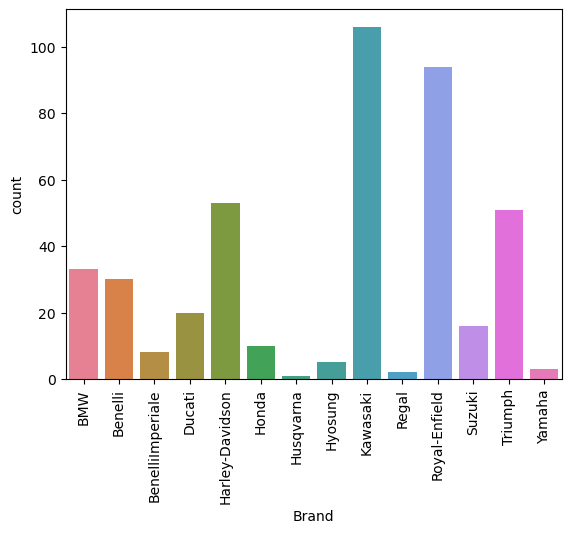

In [21]:
sns.countplot(x='Brand',data=bikes,hue='Brand')
plt.xticks(rotation=90)
plt.show()

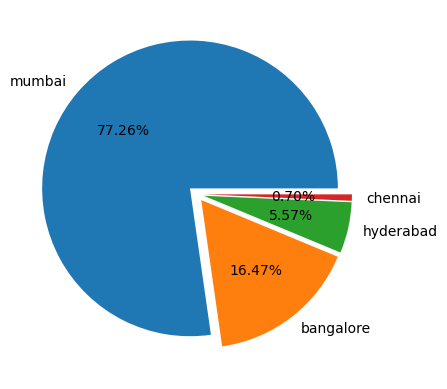

In [39]:
a = bikes['Location'].value_counts()
plt.pie(a.values, labels = a.index, autopct = "%.2f%%",explode=[0.06,0.05,0.05,0.05])
plt.show()

In [48]:
bikes.describe()

,Price,Model_Year,Road_Trip
count,4.320000e+02,432.000000,432.000000
mean,5.778791e+05,2018.106481,11055.444444
std,3.770417e+05,2.451905,6959.351717
min,1.900000e+04,2010.000000,375.000000
25%,2.950000e+05,2016.000000,5564.500000
50%,4.626500e+05,2019.000000,10475.000000
75%,7.893750e+05,2020.000000,14500.000000
max,2.544000e+06,2023.000000,35900.000000


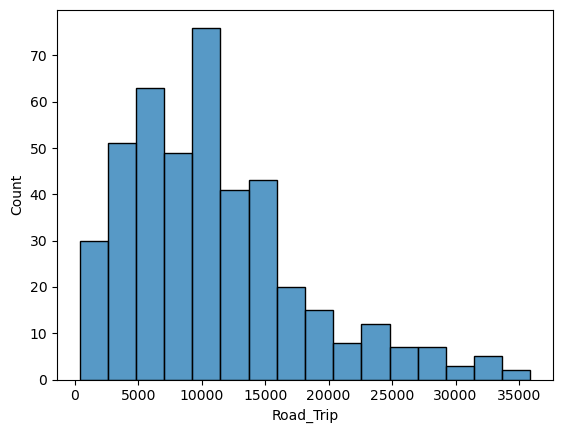

In [47]:
sns.histplot(data=bikes,x='Road_Trip')
plt.show()

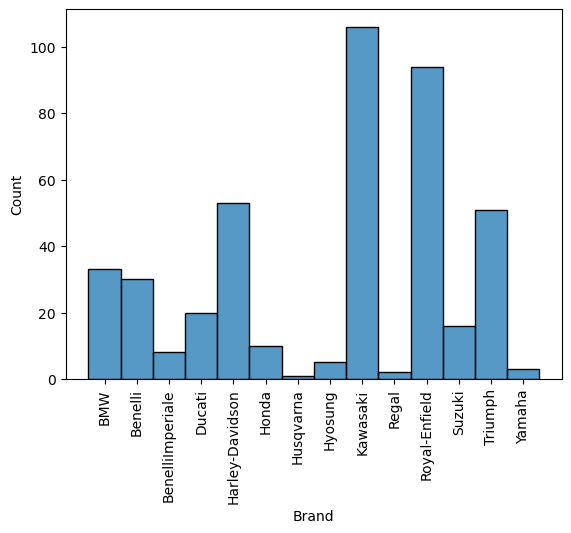

In [23]:
sns.histplot(x='Brand',data=bikes)
plt.xticks(rotation=90)
plt.show()

Continuous Variables: Central Tendency and Measures of Dispersion
|       |          Price |   Road_Trip |
|:------|---------------:|------------:|
| count |    432         |      432    |
| mean  | 577879         |    11055.4  |
| std   | 377042         |     6959.35 |
| min   |  19000         |      375    |
| 25%   | 295000         |     5564.5  |
| 50%   | 462650         |    10475    |
| 75%   | 789375         |    14500    |
| max   |      2.544e+06 |    35900    |


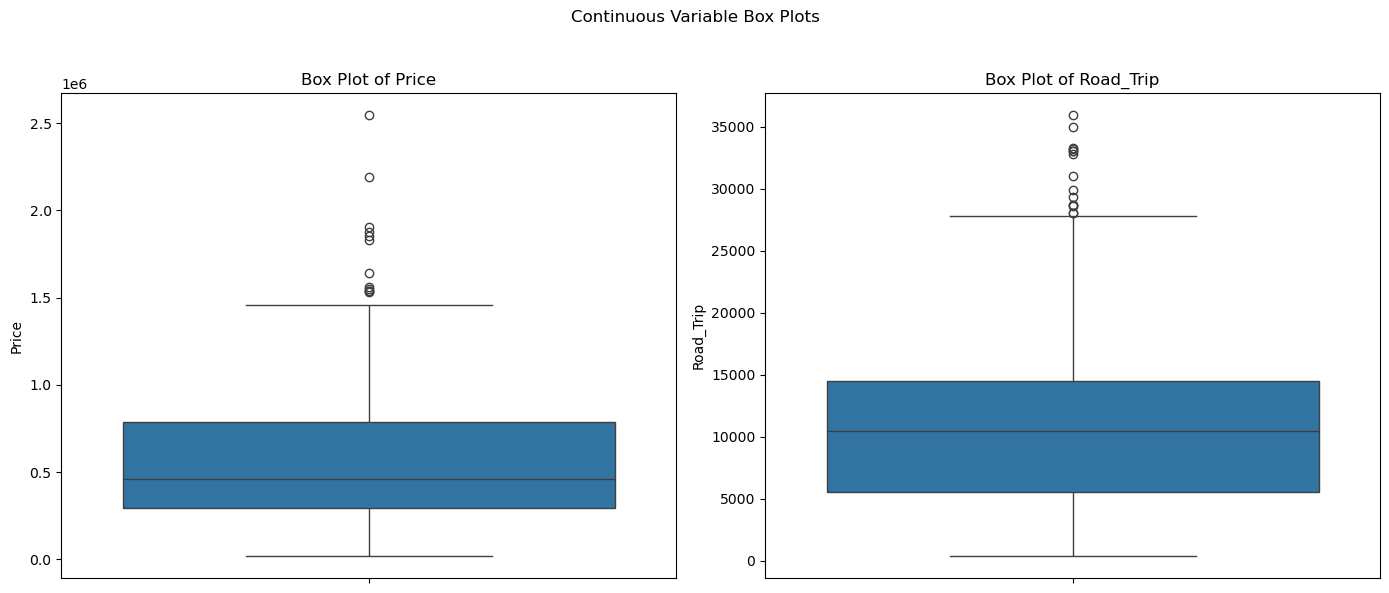

In [62]:
# Continuous Variables: Central Tendency and Measures of Dispersion
print("Continuous Variables: Central Tendency and Measures of Dispersion")
continuous_stats = bikes[['Price', 'Road_Trip']].describe()
print(continuous_stats.to_markdown())
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=bikes['Price'])
plt.title('Box Plot of Price')
plt.subplot(1, 2, 2)
sns.boxplot(y=bikes['Road_Trip'])
plt.title('Box Plot of Road_Trip')
plt.suptitle('Continuous Variable Box Plots')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

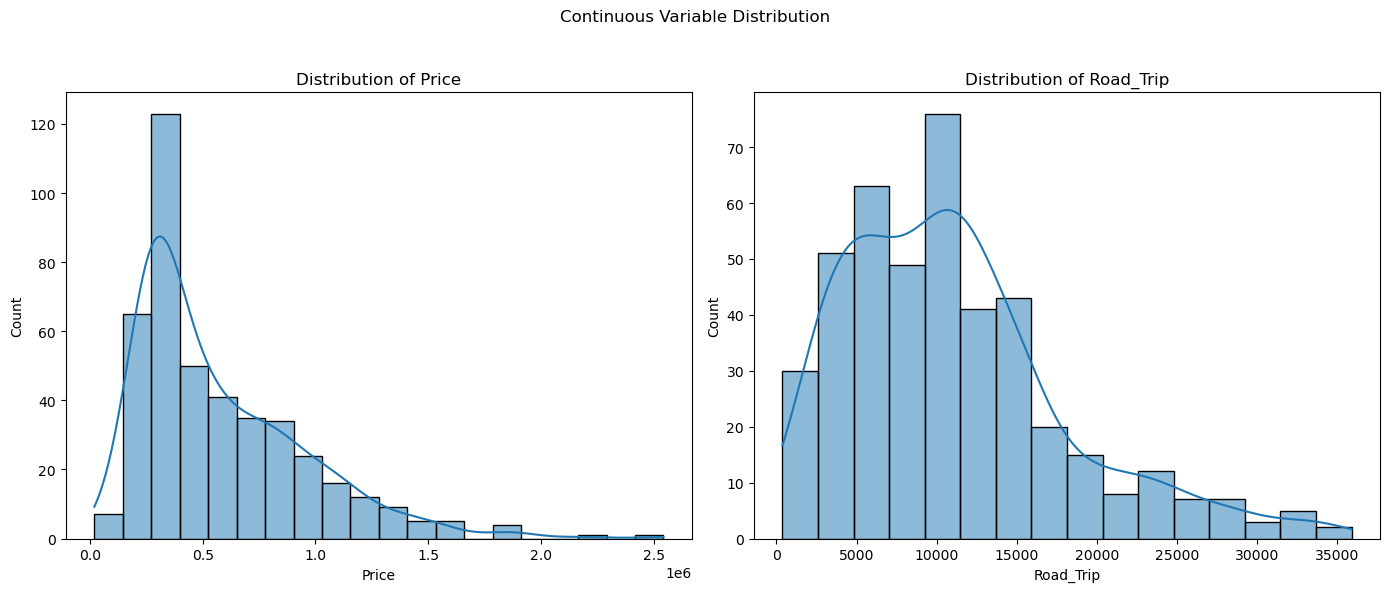

In [63]:
# Plotting Histograms/Distribution Plots
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(bikes['Price'], kde=True)
plt.title('Distribution of Price')
plt.subplot(1, 2, 2)
sns.histplot(bikes['Road_Trip'], kde=True)
plt.title('Distribution of Road_Trip')
plt.suptitle('Continuous Variable Distribution')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Brand Frequency Distribution
| Brand            |   Count |   Percentage (%) |
|:-----------------|--------:|-----------------:|
| Kawasaki         |     106 |            24.54 |
| Royal-Enfield    |      94 |            21.76 |
| Harley-Davidson  |      53 |            12.27 |
| Triumph          |      51 |            11.81 |
| BMW              |      33 |             7.64 |
| Benelli          |      30 |             6.94 |
| Ducati           |      20 |             4.63 |
| Suzuki           |      16 |             3.7  |
| Honda            |      10 |             2.31 |
| BenelliImperiale |       8 |             1.85 |
| Hyosung          |       5 |             1.16 |
| Yamaha           |       3 |             0.69 |
| Regal            |       2 |             0.46 |
| Husqvarna        |       1 |             0.23 |

## Location Frequency Distribution
| Location   |   Count |   Percentage (%) |
|:-----------|--------:|-----------------:|
| mumbai     |     333 |            77.26 |


C:\Users\DELL\AppData\Local\Temp\ipykernel_26688\3825804332.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=bikes['Brand'], order=order_brand, palette='Spectral')
C:\Users\DELL\AppData\Local\Temp\ipykernel_26688\3825804332.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bikes['Location'], order=order_location, palette='Spectral')
C:\Users\DELL\AppData\Local\Temp\ipykernel_26688\3825804332.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=bikes['Model_Year'], order=order_year, palette='Spectral')


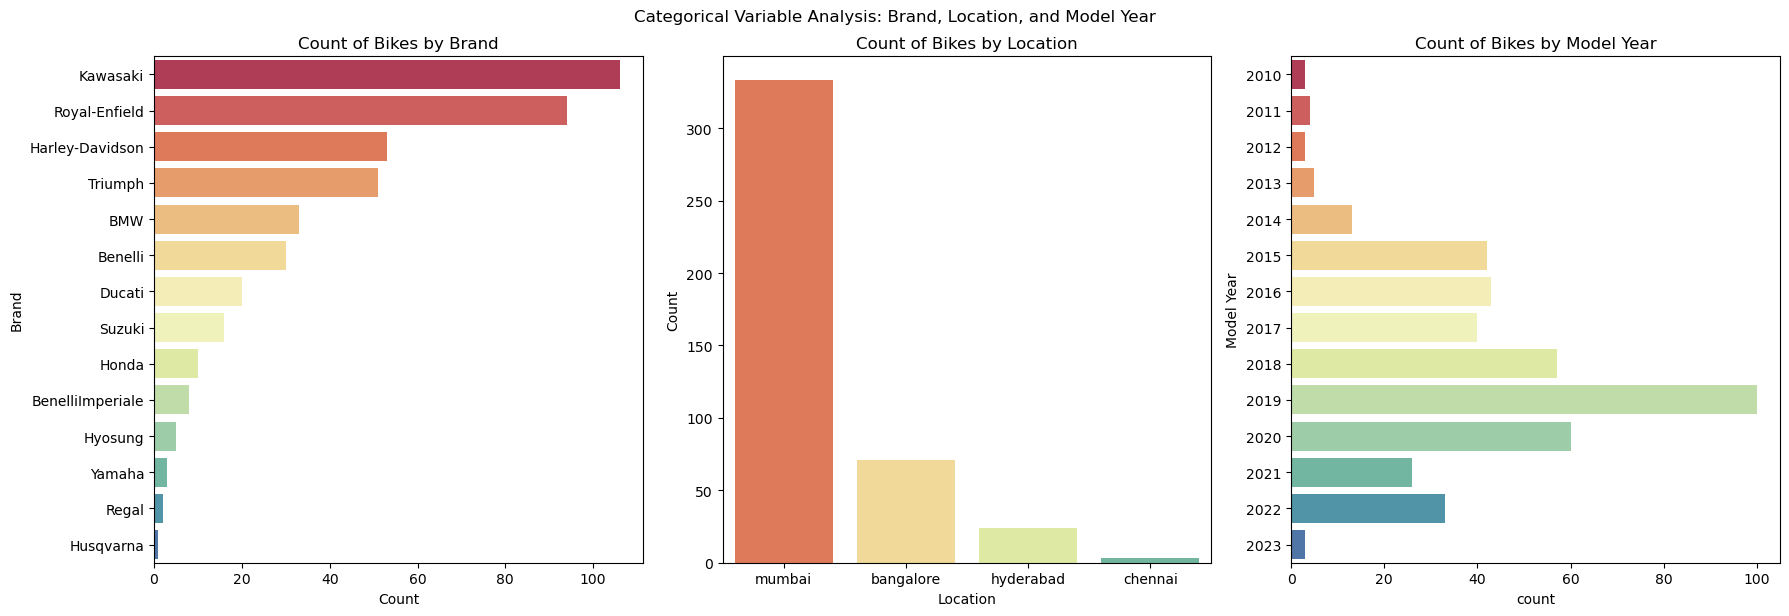

In [64]:
print("## Brand Frequency Distribution")
counts_brand = bikes['Brand'].value_counts().rename('Count')
percentages_brand = bikes['Brand'].value_counts(normalize=True).mul(100).round(2).rename('Percentage (%)')
analysis_df_brand = pd.concat([counts_brand, percentages_brand], axis=1)
print(analysis_df_brand.to_markdown())

print("\n## Location Frequency Distribution")
counts_location = bikes['Location'].value_counts().rename('Count')
percentages_location = bikes['Location'].value_counts(normalize=True).mul(100).round(2).rename('Percentage (%)')
analysis_df_location = pd.concat([counts_location, percentages_location], axis=1)
print(analysis_df_location.to_markdown())

print("\n## Model Year Frequency Distribution")
counts_year = bikes['Model_Year'].value_counts().rename('Count')
percentages_year = bikes['Model_Year'].value_counts(normalize=True).mul(100).round(2).rename('Percentage (%)')
analysis_df_year = pd.concat([counts_year, percentages_year], axis=1)
print(analysis_df_year.to_markdown())

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
order_brand = bikes['Brand'].value_counts().index
sns.countplot(y=bikes['Brand'], order=order_brand, palette='Spectral')
plt.title('Count of Bikes by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')

plt.subplot(1, 3, 2)
order_location = bikes['Location'].value_counts().index
sns.countplot(x=bikes['Location'], order=order_location, palette='Spectral')
plt.title('Count of Bikes by Location')
plt.xlabel('Location')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
order_year = sorted(bikes['Model_Year'].value_counts().index)
sns.countplot(y=bikes['Model_Year'], order=order_year, palette='Spectral')
plt.title('Count of Bikes by Model Year')
plt.xlabel('count')
plt.ylabel('Model Year')

plt.tight_layout()
plt.suptitle("Categorical Variable Analysis: Brand, Location, and Model Year", y=1.02)
plt.show()

#  Bi-variate Analysis/Multivariate : 


C:\Users\DELL\AppData\Local\Temp\ipykernel_26688\86184089.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_brand = bikes.groupby('Brand')['Price'].agg(['mean', 'median', 'min', 'max']).sort_values(by='mean', ascending=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_26688\86184089.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  road_trip_by_location = bikes.pivot_table(index='Location', values='Road_Trip', aggfunc=['mean', 'median', 'sum'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_26688\86184089.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version 

## BIVARIATE/MULTIVARIATE ANALYSIS TABLES

--- 1A. Price vs Brand (Groupby) ---
| Brand            |             mean |           median |    min |              max |
|:-----------------|-----------------:|-----------------:|-------:|-----------------:|
| Yamaha           |      1.14482e+06 |      1.007e+06   | 551250 |      1.8762e+06  |
| Honda            |      1.05433e+06 | 932031           |  19000 |      2.544e+06   |
| Suzuki           |      1.05195e+06 |      1.09462e+06 | 715500 |      1.37569e+06 |
| Ducati           | 958505           | 845350           | 524700 |      2.18825e+06 |
| Triumph          | 804408           | 805500           | 284000 |      1.452e+06   |
| Harley-Davidson  | 629607           | 551250           | 299250 |      1.5476e+06  |
| Kawasaki         | 608235           | 555495           | 109000 |      1.5635e+06  |
| BMW              | 598442           | 300875           | 236250 |      1.855e+06   |
| Benelli          | 334632           | 283750    

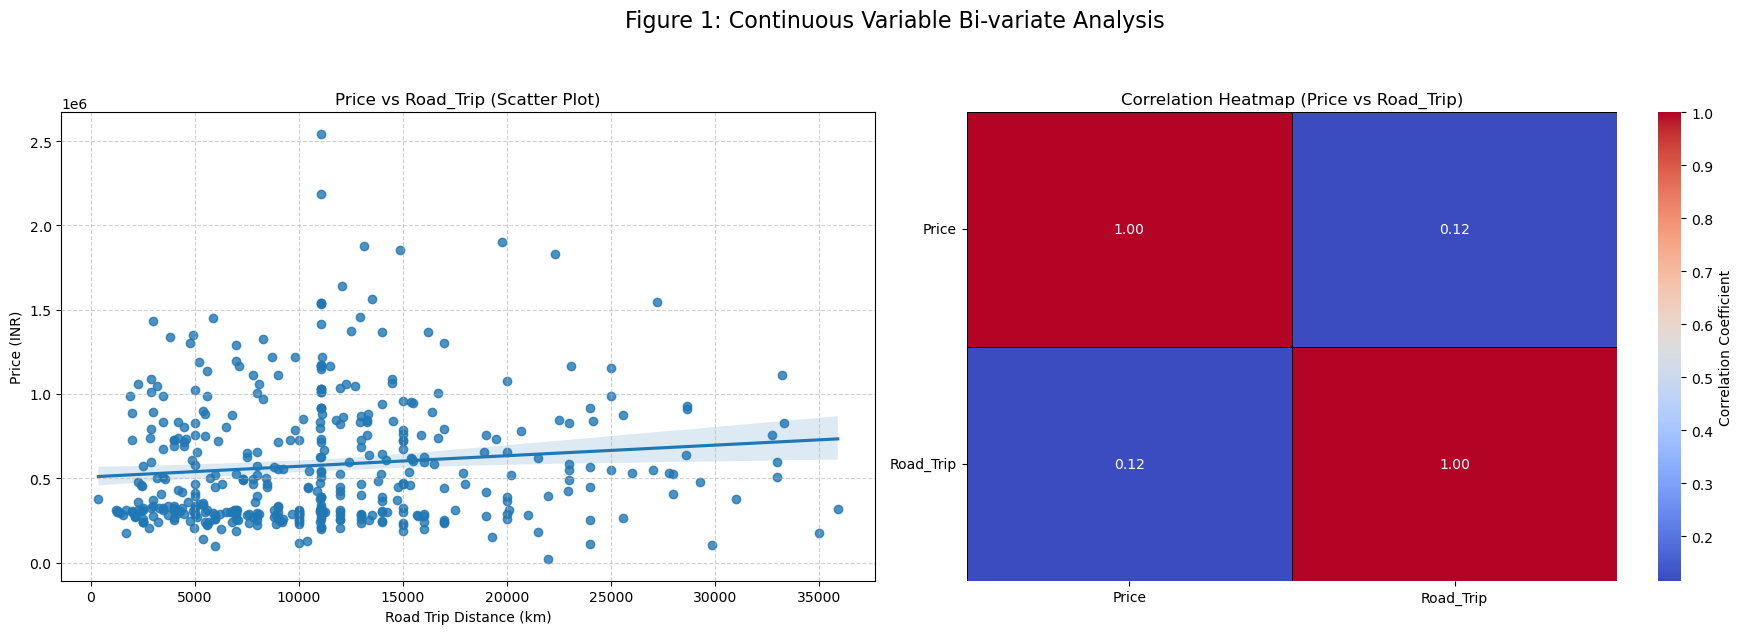

C:\Users\DELL\AppData\Local\Temp\ipykernel_26688\86184089.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Price', data=bikes, order=price_by_brand_mean, palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_26688\86184089.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Location', y='Road_Trip', data=bikes, palette='plasma')


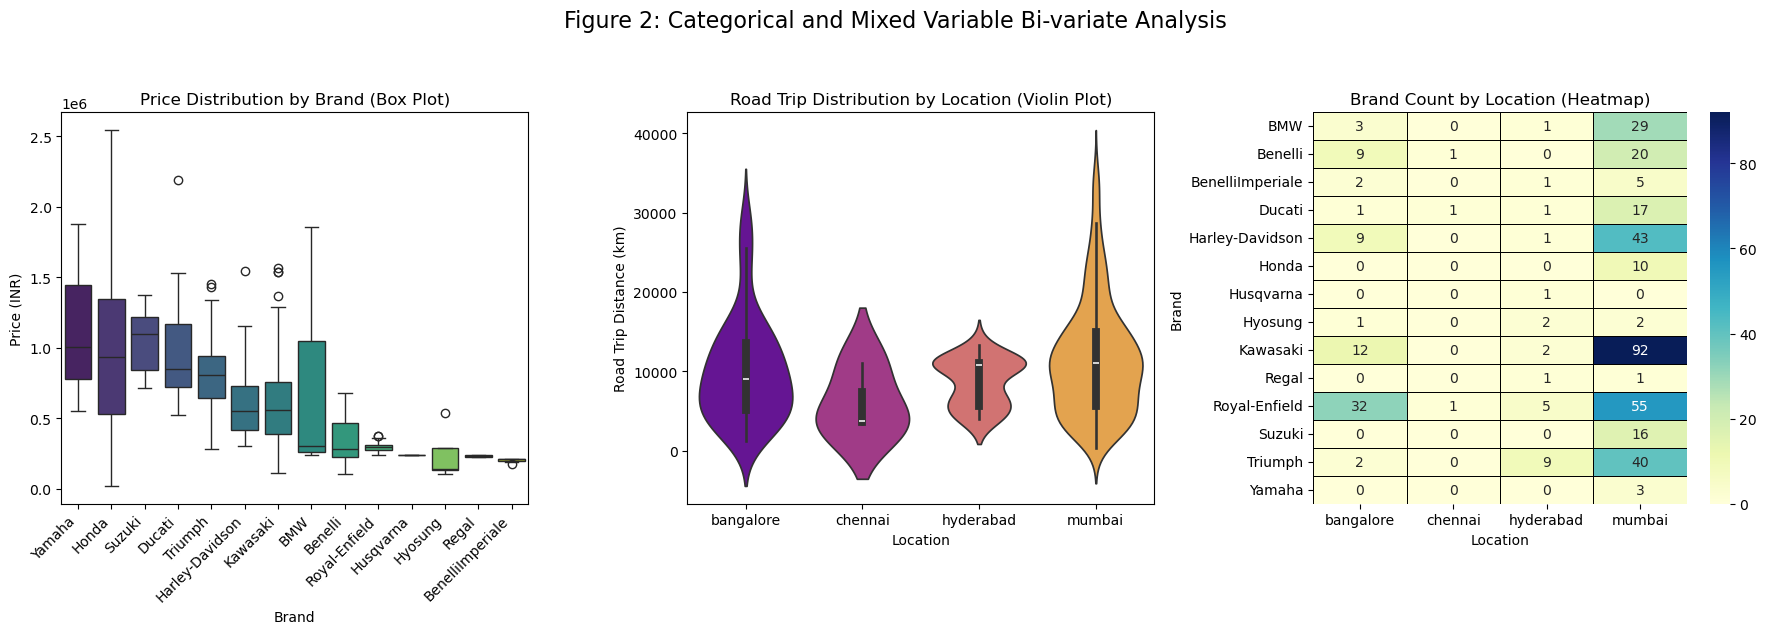

In [65]:
# --- BIVARIATE/MULTIVARIATE ANALYSIS TABLES (Groupby, Pivot, Crosstab, Correlation) ---

price_by_brand = bikes.groupby('Brand')['Price'].agg(['mean', 'median', 'min', 'max']).sort_values(by='mean', ascending=False)
road_trip_by_location = bikes.pivot_table(index='Location', values='Road_Trip', aggfunc=['mean', 'median', 'sum'])
correlation_matrix = bikes[['Price', 'Road_Trip']].corr()
brand_location_crosstab = pd.crosstab(bikes['Brand'], bikes['Location'])

print("## BIVARIATE/MULTIVARIATE ANALYSIS TABLES")
print("\n--- 1A. Price vs Brand (Groupby) ---")
print(price_by_brand.to_markdown())
print("\n--- 1B. Road_Trip vs Location (Pivot Table) ---")
print(road_trip_by_location.to_markdown())
print("\n--- 2. Continuous Correlation Matrix ---")
print(correlation_matrix.to_markdown())
print("\n--- 3. Brand vs Location (Crosstab) ---")
print(brand_location_crosstab.to_markdown())

# --- BIVARIATE/MULTIVARIATE PLOTS (Subplots) ---

price_by_brand_mean = bikes.groupby('Brand')['Price'].mean().sort_values(ascending=False).index

plt.figure(figsize=(18, 6))
plt.suptitle('Figure 1: Continuous Variable Bi-variate Analysis', fontsize=16, y=1.05)

plt.subplot(1, 2, 1)
sns.regplot(x='Road_Trip', y='Price', data=bikes)
plt.title('Price vs Road_Trip (Scatter Plot)')
plt.xlabel('Road Trip Distance (km)')
plt.ylabel('Price (INR)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap (Price vs Road_Trip)')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 6))
plt.suptitle('Figure 2: Categorical and Mixed Variable Bi-variate Analysis', fontsize=16, y=1.05)

plt.subplot(1, 3, 1)
sns.boxplot(x='Brand', y='Price', data=bikes, order=price_by_brand_mean, palette='viridis')
plt.title('Price Distribution by Brand (Box Plot)')
plt.xlabel('Brand')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.violinplot(x='Location', y='Road_Trip', data=bikes, palette='plasma')
plt.title('Road Trip Distribution by Location (Violin Plot)')
plt.xlabel('Location')
plt.ylabel('Road Trip Distance (km)')

plt.subplot(1, 3, 3)
sns.heatmap(brand_location_crosstab, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, linecolor='black')
plt.title('Brand Count by Location (Heatmap)')
plt.xlabel('Location')
plt.ylabel('Brand')

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_26688\2823200523.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_brand = bikes.groupby('Brand')['Price'].agg(['mean', 'median', 'min', 'max']).sort_values(by='mean', ascending=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_26688\2823200523.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  price_by_location = bikes.pivot_table(index='Location', values='Price', aggfunc=['mean', 'median', 'min', 'max'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_26688\2823200523.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future ver

## BIVARIATE/MULTIVARIATE TABLES FOR PRICE ANALYSIS

--- 1A. Price vs Brand (Groupby) ---
| Brand            |             mean |           median |    min |              max |
|:-----------------|-----------------:|-----------------:|-------:|-----------------:|
| Yamaha           |      1.14482e+06 |      1.007e+06   | 551250 |      1.8762e+06  |
| Honda            |      1.05433e+06 | 932031           |  19000 |      2.544e+06   |
| Suzuki           |      1.05195e+06 |      1.09462e+06 | 715500 |      1.37569e+06 |
| Ducati           | 958505           | 845350           | 524700 |      2.18825e+06 |
| Triumph          | 804408           | 805500           | 284000 |      1.452e+06   |
| Harley-Davidson  | 629607           | 551250           | 299250 |      1.5476e+06  |
| Kawasaki         | 608235           | 555495           | 109000 |      1.5635e+06  |
| BMW              | 598442           | 300875           | 236250 |      1.855e+06   |
| Benelli          | 334632           | 

C:\Users\DELL\AppData\Local\Temp\ipykernel_26688\2823200523.py:32: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.barplot(x='Model_Year', y='Price', data=price_by_year, color='skyblue',hue='Model_Year')
C:\Users\DELL\AppData\Local\Temp\ipykernel_26688\2823200523.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Location', y='Price', data=bikes, palette='plasma')


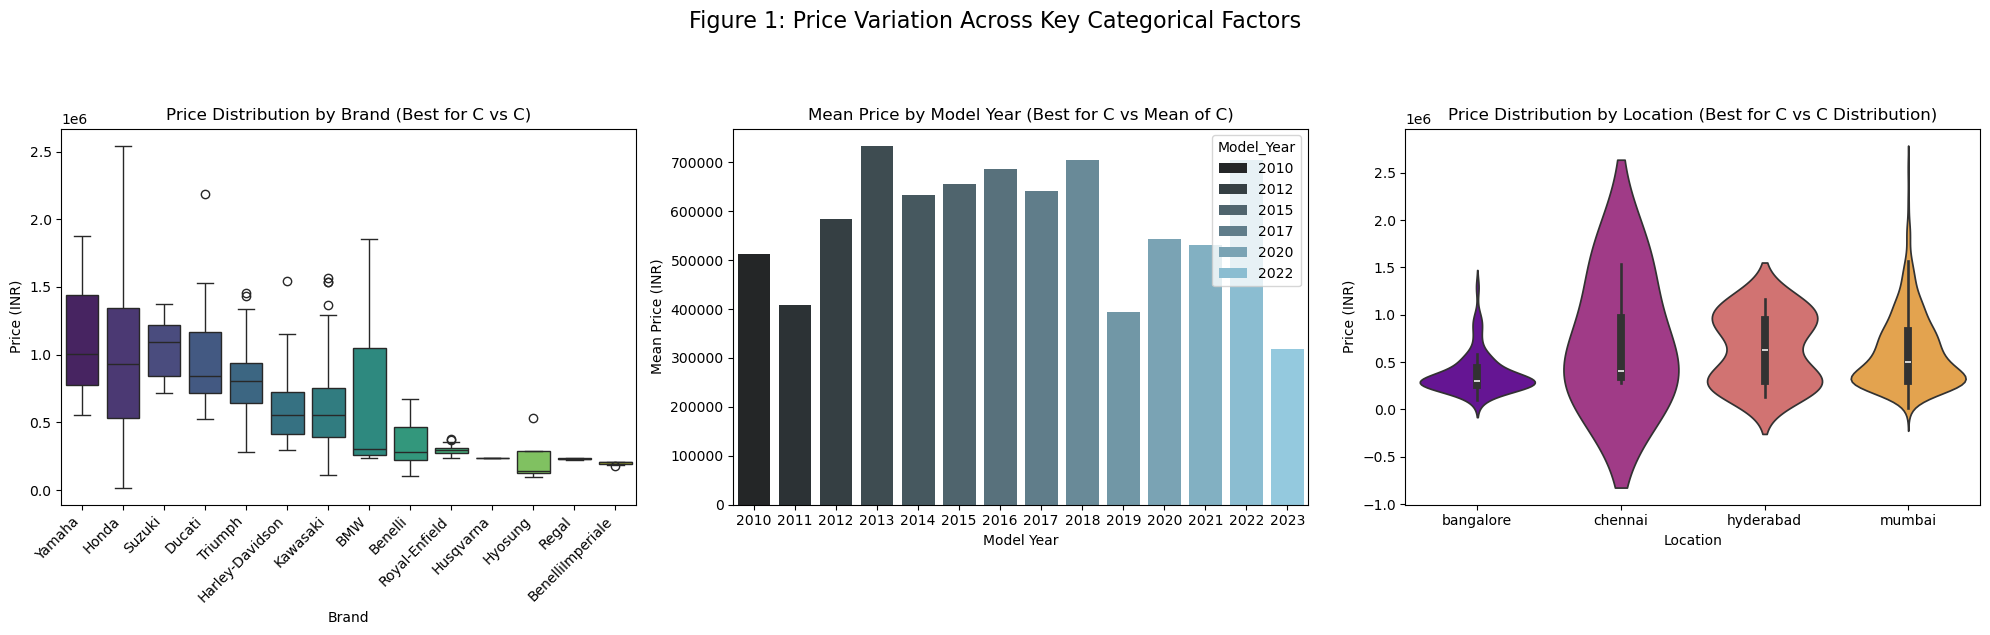

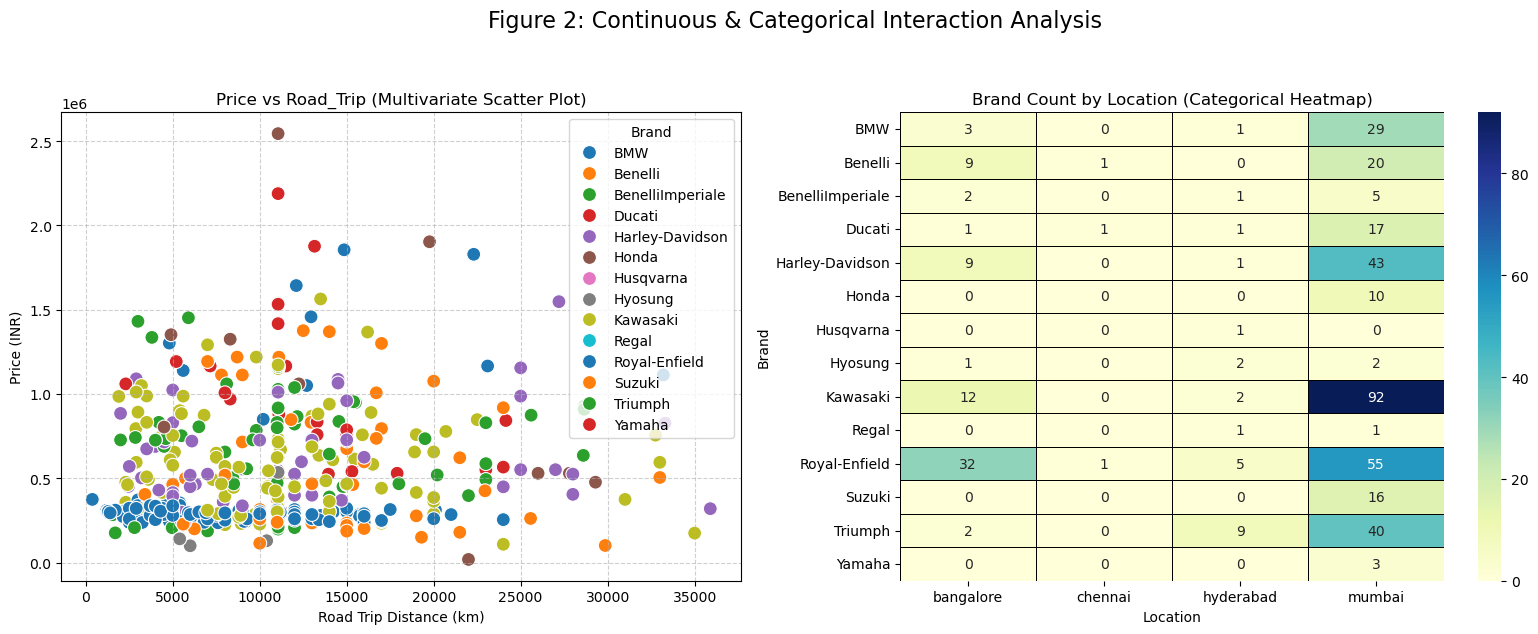

In [66]:
price_by_brand = bikes.groupby('Brand')['Price'].agg(['mean', 'median', 'min', 'max']).sort_values(by='mean', ascending=False)
price_by_brand_order = price_by_brand.index
price_by_location = bikes.pivot_table(index='Location', values='Price', aggfunc=['mean', 'median', 'min', 'max'])
correlation_matrix = bikes[['Price', 'Road_Trip']].corr()
brand_location_crosstab = pd.crosstab(bikes['Brand'], bikes['Location'])
price_by_year = bikes.groupby('Model_Year')['Price'].mean().reset_index()
# --- TABLES ---
print("## BIVARIATE/MULTIVARIATE TABLES FOR PRICE ANALYSIS")
print("\n--- 1A. Price vs Brand (Groupby) ---")
print(price_by_brand.to_markdown())
print("\n--- 1B. Price vs Location (Pivot Table) ---")
print(price_by_location.to_markdown())
print("\n--- 1C. Price vs Road_Trip (Correlation Matrix) ---")
print(correlation_matrix.to_markdown())
print("\n--- 1D. Brand vs Location (Crosstab) ---")
print(brand_location_crosstab.to_markdown())


# --- PLOTS ---
# Figure 1: Price Variation Across Key Categorical Factors
plt.figure(figsize=(20, 6))
plt.suptitle('Figure 1: Price Variation Across Key Categorical Factors', fontsize=16, y=1.05)

plt.subplot(1, 3, 1)
sns.boxplot(x='Brand', y='Price', data=bikes, order=price_by_brand_order, palette='viridis')
plt.title('Price Distribution by Brand (Best for C vs C)')
plt.xlabel('Brand')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.barplot(x='Model_Year', y='Price', data=price_by_year, color='skyblue',hue='Model_Year')
plt.title('Mean Price by Model Year (Best for C vs Mean of C)')
plt.xlabel('Model Year')
plt.ylabel('Mean Price (INR)')

plt.subplot(1, 3, 3)
sns.violinplot(x='Location', y='Price', data=bikes, palette='plasma')
plt.title('Price Distribution by Location (Best for C vs C Distribution)')
plt.xlabel('Location')
plt.ylabel('Price (INR)')

plt.tight_layout()
plt.show()

# Figure 2: Continuous & Categorical Interaction Analysis
plt.figure(figsize=(16, 6))
plt.suptitle('Figure 2: Continuous & Categorical Interaction Analysis', fontsize=16, y=1.05)

plt.subplot(1, 2, 1)
sns.scatterplot(x='Road_Trip', y='Price', data=bikes, hue='Brand', palette='tab10', s=100)
plt.title('Price vs Road_Trip (Multivariate Scatter Plot)')
plt.xlabel('Road Trip Distance (km)')
plt.ylabel('Price (INR)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
sns.heatmap(brand_location_crosstab, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, linecolor='black')
plt.title('Brand Count by Location (Categorical Heatmap)')
plt.xlabel('Location')
plt.ylabel('Brand')

plt.tight_layout()
plt.show()

In [67]:
bikes

,Brand,Model,Price,Location,Engine,Model_Year,Fuel_Type,Road_Trip
sl_no,,,,,,,,
1,Royal-Enfield,Continental,295000,NaN,NaN,2019,petrol,4200
2,Harley-Davidson,Street,320000,mumbai,650cc,2015,petrol,35900
3,Royal-Enfield,Interceptor,310000,hyderabad,750cc,2022,petrol,7050
4,BMW,G310,310000,hyderabad,650cc,2023,petrol,6900
5,Royal-Enfield,Continental,340000,hyderabad,600cc,2020,petrol,11055
...,...,...,...,...,...,...,...,...
428,Kawasaki,Ninja,363125,mumbai,883cc,2017,petrol,14000
429,Kawasaki,Z650,466875,mumbai,650cc,2018,petrol,7800
430,Harley-Davidson,Street,337187,mumbai,600cc,2016,petrol,9000


<Axes: xlabel='Price', ylabel='Road_Trip'>

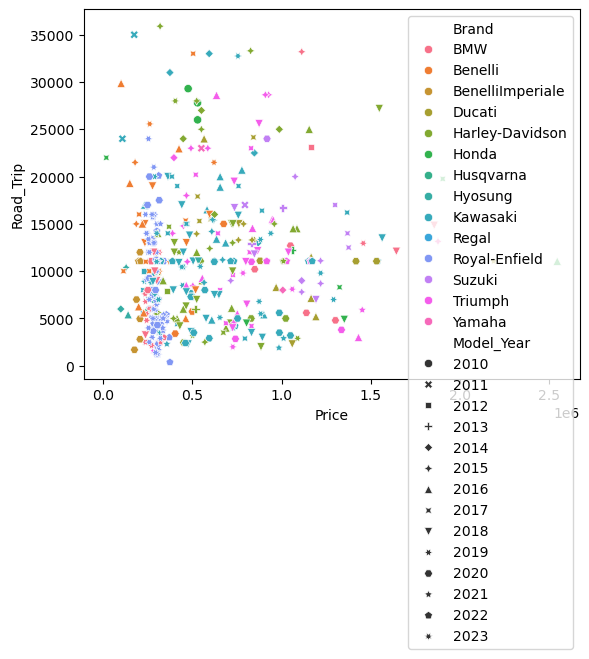

In [68]:
sns.scatterplot(data=bikes,x='Price',y='Road_Trip',hue='Brand',style='Model_Year')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'BMW'),
  Text(1, 0, 'Benelli'),
  Text(2, 0, 'BenelliImperiale'),
  Text(3, 0, 'Ducati'),
  Text(4, 0, 'Harley-Davidson'),
  Text(5, 0, 'Honda'),
  Text(6, 0, 'Husqvarna'),
  Text(7, 0, 'Hyosung'),
  Text(8, 0, 'Kawasaki'),
  Text(9, 0, 'Regal'),
  Text(10, 0, 'Royal-Enfield'),
  Text(11, 0, 'Suzuki'),
  Text(12, 0, 'Triumph'),
  Text(13, 0, 'Yamaha')])

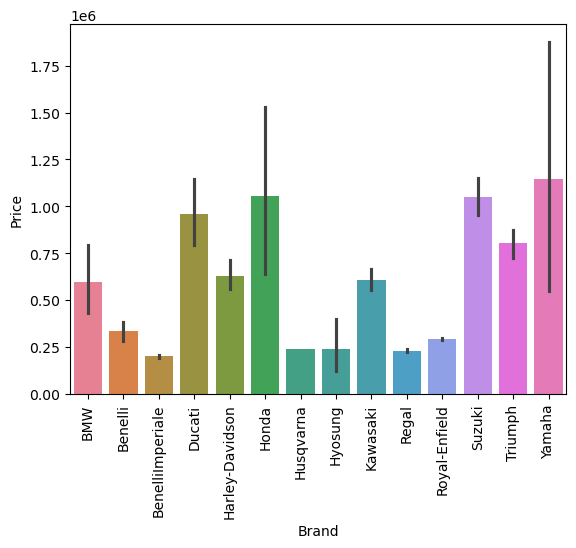

In [69]:
sns.barplot(data=bikes,y='Price',x='Brand',hue='Brand')
plt.xticks(rotation=90)

In [70]:
bikes

,Brand,Model,Price,Location,Engine,Model_Year,Fuel_Type,Road_Trip
sl_no,,,,,,,,
1,Royal-Enfield,Continental,295000,NaN,NaN,2019,petrol,4200
2,Harley-Davidson,Street,320000,mumbai,650cc,2015,petrol,35900
3,Royal-Enfield,Interceptor,310000,hyderabad,750cc,2022,petrol,7050
4,BMW,G310,310000,hyderabad,650cc,2023,petrol,6900
5,Royal-Enfield,Continental,340000,hyderabad,600cc,2020,petrol,11055
...,...,...,...,...,...,...,...,...
428,Kawasaki,Ninja,363125,mumbai,883cc,2017,petrol,14000
429,Kawasaki,Z650,466875,mumbai,650cc,2018,petrol,7800
430,Harley-Davidson,Street,337187,mumbai,600cc,2016,petrol,9000


In [71]:
k=pd.crosstab(bikes['Brand'],bikes['Location'],margins=True,normalize=True)

In [72]:
k.apply(lambda x:x/x.iloc[-1],axis=0)

Location,bangalore,chennai,hyderabad,mumbai,All
Brand,,,,,
BMW,0.042254,0.000000,0.041667,0.087087,0.076566
Benelli,0.126761,0.333333,0.000000,0.060060,0.069606
BenelliImperiale,0.028169,0.000000,0.041667,0.015015,0.018561
Ducati,0.014085,0.333333,0.041667,0.051051,0.046404
Harley-Davidson,0.126761,0.000000,0.041667,0.129129,0.122970
Honda,0.000000,0.000000,0.000000,0.030030,0.023202
Husqvarna,0.000000,0.000000,0.041667,0.000000,0.002320
Hyosung,0.014085,0.000000,0.083333,0.006006,0.011601
Kawasaki,0.169014,0.000000,0.083333,0.276276,0.245940


In [73]:
k

Location,bangalore,chennai,hyderabad,mumbai,All
Brand,,,,,
BMW,0.006961,0.000000,0.002320,0.067285,0.076566
Benelli,0.020882,0.002320,0.000000,0.046404,0.069606
BenelliImperiale,0.004640,0.000000,0.002320,0.011601,0.018561
Ducati,0.002320,0.002320,0.002320,0.039443,0.046404
Harley-Davidson,0.020882,0.000000,0.002320,0.099768,0.122970
Honda,0.000000,0.000000,0.000000,0.023202,0.023202
Husqvarna,0.000000,0.000000,0.002320,0.000000,0.002320
Hyosung,0.002320,0.000000,0.004640,0.004640,0.011601
Kawasaki,0.027842,0.000000,0.004640,0.213457,0.245940


In [74]:
bikes

,Brand,Model,Price,Location,Engine,Model_Year,Fuel_Type,Road_Trip
sl_no,,,,,,,,
1,Royal-Enfield,Continental,295000,NaN,NaN,2019,petrol,4200
2,Harley-Davidson,Street,320000,mumbai,650cc,2015,petrol,35900
3,Royal-Enfield,Interceptor,310000,hyderabad,750cc,2022,petrol,7050
4,BMW,G310,310000,hyderabad,650cc,2023,petrol,6900
5,Royal-Enfield,Continental,340000,hyderabad,600cc,2020,petrol,11055
...,...,...,...,...,...,...,...,...
428,Kawasaki,Ninja,363125,mumbai,883cc,2017,petrol,14000
429,Kawasaki,Z650,466875,mumbai,650cc,2018,petrol,7800
430,Harley-Davidson,Street,337187,mumbai,600cc,2016,petrol,9000


In [75]:
w=pd.crosstab(bikes['Brand'],bikes['Engine'],margins=True,normalize=True)

In [76]:
w.apply(lambda x:x/x.iloc[-1],axis=0)

Engine,1000cc,100cc,1050cc,110cc,1200cc,120cc,1300cc,250cc,25cc,300cc,...,797cc,800cc,821cc,850cc,865cc,883cc,900cc,950cc,959cc,All
Brand,,,,,,,,,,,,,,,,,,,,,
BMW,0.333333,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.00,0.066667,...,0.5,0.000000,0.0,0.75,0.0,0.000000,0.055556,0.0,0.000000,0.076566
Benelli,0.166667,0.071429,0.0,0.0,0.111111,0.142857,0.166667,0.5,0.00,0.033333,...,0.0,0.000000,0.0,0.00,0.0,0.166667,0.055556,0.0,0.000000,0.069606
BenelliImperiale,0.000000,0.071429,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.25,0.000000,...,0.0,0.000000,0.0,0.00,0.0,0.083333,0.000000,0.0,0.000000,0.018561
Ducati,0.166667,0.142857,0.0,0.0,0.111111,0.142857,0.000000,0.0,0.00,0.000000,...,0.5,0.000000,0.0,0.00,0.5,0.000000,0.055556,0.0,0.000000,0.046404
Harley-Davidson,0.000000,0.285714,0.0,0.0,0.111111,0.000000,0.166667,0.0,0.00,0.133333,...,0.0,0.000000,0.0,0.00,0.0,0.166667,0.000000,0.0,0.000000,0.122970
Honda,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.066667,...,0.0,0.000000,0.0,0.00,0.0,0.000000,0.055556,0.0,0.000000,0.023202
Husqvarna,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,...,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.002320
Hyosung,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,...,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.333333,0.011601
Kawasaki,0.333333,0.285714,1.0,0.0,0.333333,0.142857,0.166667,0.0,0.50,0.300000,...,0.0,0.333333,1.0,0.25,0.0,0.250000,0.166667,0.0,0.333333,0.245940


In [77]:
x=pd.crosstab(bikes['Brand'],bikes['Model_Year'],margins=True,normalize=True)

In [78]:
x.apply(lambda x:x/x.iloc[-1],axis=0)

Model_Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,All
Brand,,,,,,,,,,,,,,,
BMW,0.0,0.00,0.333333,0.0,0.000000,0.023810,0.000000,0.000,0.122807,0.12,0.100000,0.153846,0.030303,0.333333,0.076389
Benelli,0.0,0.00,0.000000,0.0,0.000000,0.047619,0.162791,0.150,0.105263,0.06,0.050000,0.000000,0.000000,0.000000,0.069444
BenelliImperiale,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.083333,0.000000,0.090909,0.000000,0.018519
Ducati,0.0,0.00,0.000000,0.0,0.000000,0.119048,0.116279,0.100,0.035088,0.00,0.050000,0.038462,0.000000,0.000000,0.046296
Harley-Davidson,0.0,0.00,0.333333,0.2,0.384615,0.261905,0.279070,0.050,0.192982,0.04,0.066667,0.038462,0.030303,0.000000,0.122685
Honda,1.0,0.00,0.000000,0.2,0.000000,0.000000,0.023256,0.075,0.035088,0.00,0.000000,0.000000,0.000000,0.000000,0.023148
Husqvarna,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.038462,0.000000,0.000000,0.002315
Hyosung,0.0,0.00,0.000000,0.0,0.076923,0.023810,0.023256,0.000,0.017544,0.00,0.016667,0.000000,0.000000,0.000000,0.011574
Kawasaki,0.0,0.50,0.333333,0.2,0.307692,0.166667,0.209302,0.300,0.315789,0.22,0.200000,0.192308,0.393939,0.000000,0.245370


<Axes: ylabel='Count'>

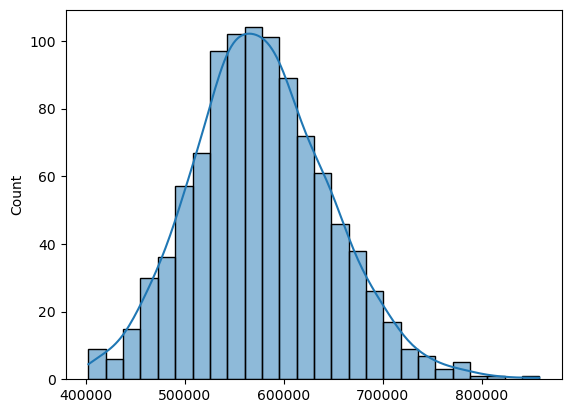

In [79]:
# sample sistribution 
# sample size = 30
n=30
sample_means=[]
# number of samples should be vary large 
m=1000
for i in range(m):
    samp_mean=bikes.sample(n=n)['Price'].mean()
    sample_means.append(samp_mean)
sns.histplot(sample_means,kde=True)

<Axes: ylabel='Count'>

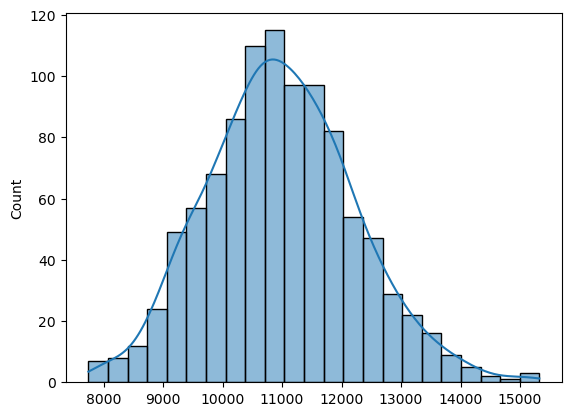

In [80]:
# sample sistribution 
# sample size = 30
n=30
sample_means=[]
# number of samples should be vary large 
m=1000
for i in range(m):
    samp_mean=bikes.sample(n=n)['Road_Trip'].mean()
    sample_means.append(samp_mean)
sns.histplot(sample_means,kde=True)

In [81]:
mean_sample_means=np.array(sample_means).mean()

In [82]:
mean_sample_means

np.float64(10986.849333333334)

In [83]:
bikes['Road_Trip'].mean()

np.float64(11055.444444444445)